# Monitoring Neural Networks Exercise: Classifying Mushrooms 🍄🍴😋😵☠️

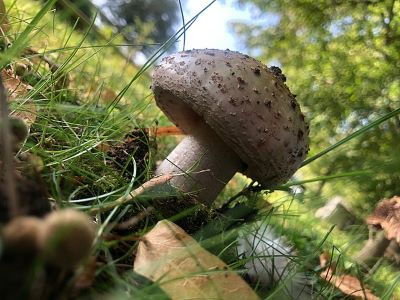

In this exercise, we will practice what we have learned about monitoring neural networks, building a network to classify edible and poisonous mushrooms. Using data adapted from the [UCI Mushroom Classification dataset](https://www.kaggle.com/uciml/mushroom-classification), train a model to separate tasty shrooms from deadly fungus!

## Part 1: Preprocessing

**Questions:**
1. Load the attached `mushrooms.csv` dataset and explore it lightly. You may view the data dictionary at the [Kaggle page](https://www.kaggle.com/uciml/mushroom-classification) for the dataset (under "About this file") - note that we are only using a subset of the features there. In particular, the target feature is 'class' (e=edible, p=poisonous).
2. Assuming e is class 0 and p is class 1, do we care more about precision or recall for this task?
3. Use `pd.get_dummies(...)` to one-hot encode the input features. For the target, use `1` for poisonous mushrooms and `0` for edible mushrooms. Perform a 70%-30% train-test split and save the data in variables `X_train, X_test, y_train, y_test`. Display the number of train and test samples.

In [1]:
import pandas as pd

mushrooms_df = pd.read_csv("mushrooms.csv")
display(mushrooms_df.head())
display(mushrooms_df.info())
display(mushrooms_df.describe())
display(mushrooms_df['class'].unique())


,class,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-color,ring-number,population
0,p,x,s,t,f,c,n,e,w,o,s
1,e,x,s,t,f,c,b,e,w,o,n
2,e,b,s,t,f,c,b,e,w,o,n
3,p,x,y,t,f,c,n,e,w,o,s
4,e,x,s,f,f,w,b,t,w,o,a


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            8124 non-null   object
 1   cap-shape        8124 non-null   object
 2   cap-surface      8124 non-null   object
 3   bruises          8124 non-null   object
 4   gill-attachment  8124 non-null   object
 5   gill-spacing     8124 non-null   object
 6   gill-size        8124 non-null   object
 7   stalk-shape      8124 non-null   object
 8   veil-color       8124 non-null   object
 9   ring-number      8124 non-null   object
 10  population       8124 non-null   object
dtypes: object(11)
memory usage: 698.3+ KB


None

,class,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-color,ring-number,population
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,2,2,2,2,2,4,3,6
top,e,x,y,f,f,c,b,t,w,o,v
freq,4208,3656,3244,4748,7914,6812,5612,4608,7924,7488,4040


array(['p', 'e'], dtype=object)

2. 
We have prioritize recall over precision. We want to minimize false negatives (poisonous mushrooms classified as edible), even if it means accepting more false positives

In [2]:
# 3
from sklearn.model_selection import train_test_split

mushrooms_df = pd.read_csv("mushrooms.csv")

mushrooms_encoded = pd.get_dummies(mushrooms_df.drop('class', axis=1))
mushrooms_encoded['class'] = mushrooms_df['class'].map({'p': 1, 'e': 0})

X = mushrooms_encoded.drop('class', axis=1)
y = mushrooms_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5686, 33)
Shape of X_test: (2438, 33)
Shape of y_train: (5686,)
Shape of y_test: (2438,)


## Part 2: Baseline Model

4. We want to train a simple model to get a baseline result that we can compare our neural network to. Train a logistic regression model to predict the target (whether a mushroom is poisonous). Display the relevant metrics for your model calculated on the test set.
5. If we hold a huge dinner party with 100 guests and serve each guest one mushroom that our model said is edible, how many guests would we expect to be poisoned?

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Positives (TP):", tp)
print("true Negatives (tN):", tn)
print("False Negatives (FN):", fn)
print("False Positives (FP):", fp)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


True Positives (TP): 1079
true Negatives (tN): 1192
False Negatives (FN): 102
False Positives (FP): 65

Accuracy: 0.9315012305168171
Precision: 0.9431818181818182
Recall: 0.9136325148179509
F1 Score: 0.9281720430107528
Accuracy: 0.9315012305168171
Precision: 0.9431818181818182
Recall: 0.9136325148179509
F1 Score: 0.9281720430107528


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


To guess the number of guests who would be poisoned, we have to look how many mushrooms did we predict as not poisonous (label 0), but were in fact poisonous, we want to know the number of FN, and the FN rate :

In [4]:
fn_rate = fn / (tp + fn)
print("False Negative Rate (FN rate):", fn_rate)

False Negative Rate (FN rate): 0.0863674851820491


As we see, we would except 8-9 people to be poisoned, not such a funny party.

## Part 3: Building and Monitoring a Neural Network

6. Create a simple MLP network (vanilla feedforward network) in Keras with the following two layers:
  * Dense(10, activation='relu')
  * Dense(1, activation='sigmoid')

   Explain in words why the activation functions make sense for this task, and why the last layer has only one unit.


In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The ReLU activation function is used in the hidden layer to introduce non-linearity and allow the network to learn complex patterns in the data.

The sigmoid activation function is used in the output layer for binary classification tasks. It squashes the output between 0 and 1, representing the probability of the input belonging to the positive class (poisonous). One unit in the output layer is sufficient for binary classification, providing the probability score for the positive class.

7. Train your network on the training data using the Adam optimizer and batch size 4. Use use `X_test` and `y_test` in the `validation_data=` parameter of your Keras model's `fit(...)` method. Use the Keras `EarlyStopping` callback tracking validation loss to let the model decide how many epochs to train for. Make sure the best weights are restored at the end of training.
8. Display two plots:
  * Train and validation loss per epoch
  * Train and validation accuracy per epoch
  
  Make sure to include a legend that shows which curve is train loss/accuracy and which is validation loss/accuracy.


In [6]:
# 7
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

optimizer = Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, batch_size=4, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - accuracy: 0.8049 - loss: 0.4645 - val_accuracy: 0.9442 - val_loss: 0.2044
Epoch 2/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.9404 - loss: 0.1912 - val_accuracy: 0.9553 - val_loss: 0.1411
Epoch 3/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.9600 - loss: 0.1294 - val_accuracy: 0.9725 - val_loss: 0.0930
Epoch 4/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.9758 - loss: 0.0820 - val_accuracy: 0.9836 - val_loss: 0.0647
Epoch 5/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.9860 - loss: 0.0598 - val_accuracy: 0.9869 - val_loss: 0.0504
Epoch 6/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.9875 - loss: 0.0451 - val_accuracy: 0.9869 - val_loss: 0.0392
Epoch 7/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.9907 - loss: 0.0334 - val_accuracy: 0.9869 - val_loss: 0.0345
Epoch 8/100
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 

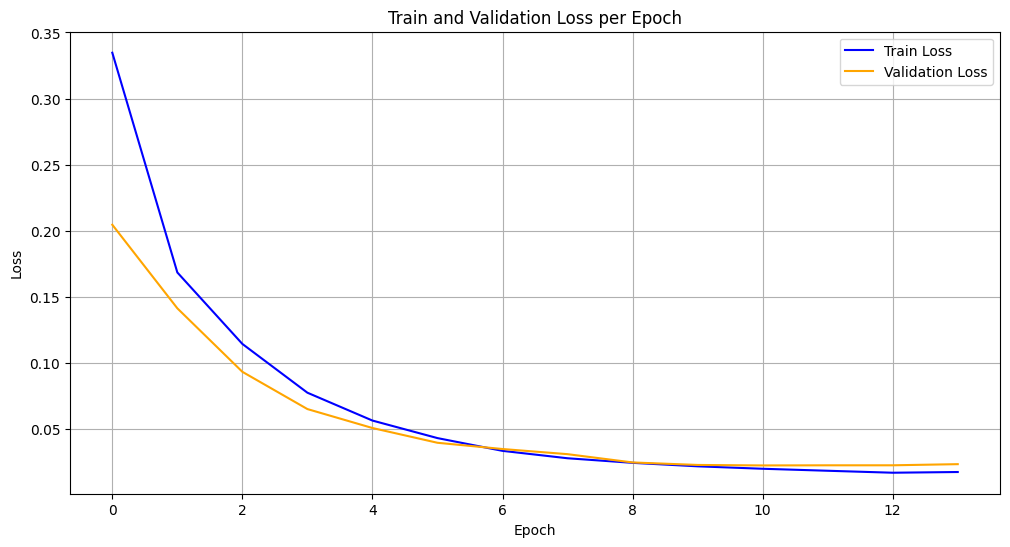

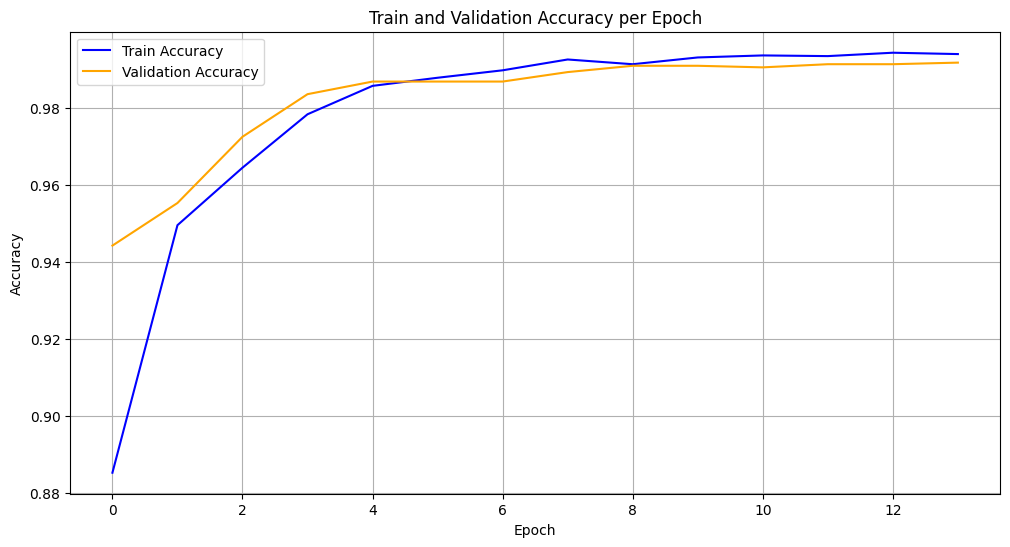

In [7]:
# 8
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Train and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Train and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


9. If we use this model for our dinner party from question 5, how many guests do we expect to be poisoned? (Hint: Use `model.predict(...)` and sklearn's classification report.)
10. Save your model as a Keras SavedModel using `.save(...)` with whatever filename you would like. What files does this create? (List them with command(s) or write a list of filenames.)
11. Using `tensorflow.keras.models.load_model(...)`, load the saved model into a new Python variable. Verify that it gives the same predictions on the test data as our original trained network.

In [8]:
# 9
from sklearn.metrics import classification_report

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
report = classification_report(y_test, y_pred)

print(report)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1257
           1       0.99      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



Again we want to know the FN rate :

In [9]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fn_rate = fn / (tp + fn)
print("False Negative Rate (FN rate):", fn_rate)

False Negative Rate (FN rate): 0.011854360711261643


only 0.4% so not one person should be poisoned

In [10]:
# 10 
model.save("model.keras")

!ls -l model.keras


-rw-r--r--  1 nathanszpilman  staff  20251 Feb 29 15:05 model.keras


The saved .keras file contains:

    The model's configuration (architecture)
    The model's weights
    The model's optimizer's state 

In [11]:
# 11
from tensorflow.keras.models import load_model

loaded_model = load_model("model.keras")
y_pred_loaded = loaded_model.predict(X_test)
y_pred_loaded_binary = (y_pred_loaded > 0.5).astype(int)

print("Are predictions from the loaded model the same as the original model?", (y_pred_loaded_binary == y_pred).all())

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step
Are predictions from the loaded model the same as the original model? True


We indeed obtained the same results.
